# Plotting Distributions in Databricks
<img src='https://matplotlib.org/_static/logo2.png' />

Databricks is a powerful tool for exploring and analyzing data.  When you first open a new dataset, one of the first things you may want to
understand is the distribution of numerical variables.  This resuable code shows how you can quickly view that data.

## Load Some Data Into Spark
First, we'll make a Spark dataframe.

In [0]:
# Read in sample data from a CSV file and infer the schema
df = spark\
      .read\
      .option("inferSchema", "true")\
      .option("header", "true")\
      .csv("/databricks-datasets/flights/departuredelays.csv")

display(df)

date,delay,distance,origin,destination
1011245,6,602,ABE,ATL
1020600,-8,369,ABE,DTW
1021245,-2,602,ABE,ATL
1020605,-4,602,ABE,ATL
1031245,-4,602,ABE,ATL
1030605,0,602,ABE,ATL
1041243,10,602,ABE,ATL
1040605,28,602,ABE,ATL
1051245,88,602,ABE,ATL
1050605,9,602,ABE,ATL


Loop through all of the columns in our dataframe and identify the ones with a numeric data type.

In [0]:
numeric_columns = []
numeric_types = ['double', 'float', 'int', 'long', 'short']

for x in df.dtypes:
  if x[1] in numeric_types:
    numeric_columns.append(x[0])
    
numeric_columns

Out[2]: ['date', 'delay', 'distance']

The next cell does the real work here.  It declares a function that accepts a Spark dataframe and the names of the columns for which we wish to plot the distribution.
Plotting for a *really* big dataset would take a long time (and possibly crash the driver node) so, when necessary, we sample only 1,000,000 rows from the dataframe
to use in our plots.

We use the "[seaborn](https://seaborn.pydata.org/)" package to create a plot of the distribution.  It includes both a histogram of the values and a plot of the
probability distribution curve.  We use the underlying "matplotlib" library's functionality to augment the histogram with vertical lines showing the mean and
one standard deviation from the mean.

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distributions(df, cols):
  row_count = df.count()
  target_size = 1000000
  
  num_df = df.select(cols)
  
  # If the input dataframe is super big, sample the rows to a more manageable size.
  if row_count > 2 * target_size:
    fraction = target_size / row_count
    sampled_df = num_df.sample(False, fraction)
  else:
    sampled_df = num_df
  
  sampled_df.cache()
  
  plot_count = len(cols)
  counter = 1
  
  fig = plt.figure()

  for col in cols:
    col_name = cols[counter - 1]
    values = np.array(sampled_df.select(col_name).collect())

    # Let Seaborn plot the distribution
    ax = plt.subplot(plot_count, 1, counter)
    ax = sns.distplot(values)

    # Add vertical lines showing the mean and +/- 1 standard deviation
    mean = np.mean(values)
    sigma1, sigma2 = mean - np.std(values), mean + np.std(values)
    min, max = np.min(values), np.max(values)
    padding = (max - min) * 0.005

    ax.axvline(mean, color='#c00000', linestyle='dashed', linewidth=1)
    ax.annotate("$\mu$={:,.1f}".format(mean), xy=(mean + padding, 0), ha='left', fontsize=10)

    ax.axvline(sigma1, color='#202020', linestyle='dashed', linewidth=0.5, alpha=0.37)
    ax.axvline(sigma2, color='#202020', linestyle='dashed', linewidth=0.5, alpha=0.37)

    ax.set_title("Distribution  of  \"{}\"".format(col_name), {'fontsize': '20'})
    ax.set_ylabel('probability')
    
    counter += 1

  fig.suptitle("Distribution of Numeric Values in a Spark Dataframe", fontsize=35)
  fig.set_dpi(96)
  fig.set_size_inches(18, 6.5 * plot_count)
  
  if plot_count == 1:
    plt.subplots_adjust(top = 0.8)
  else:
    plt.subplots_adjust(hspace=0.5)

  return(fig)

Now just pass our dataframe to the function, and display the results!

/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

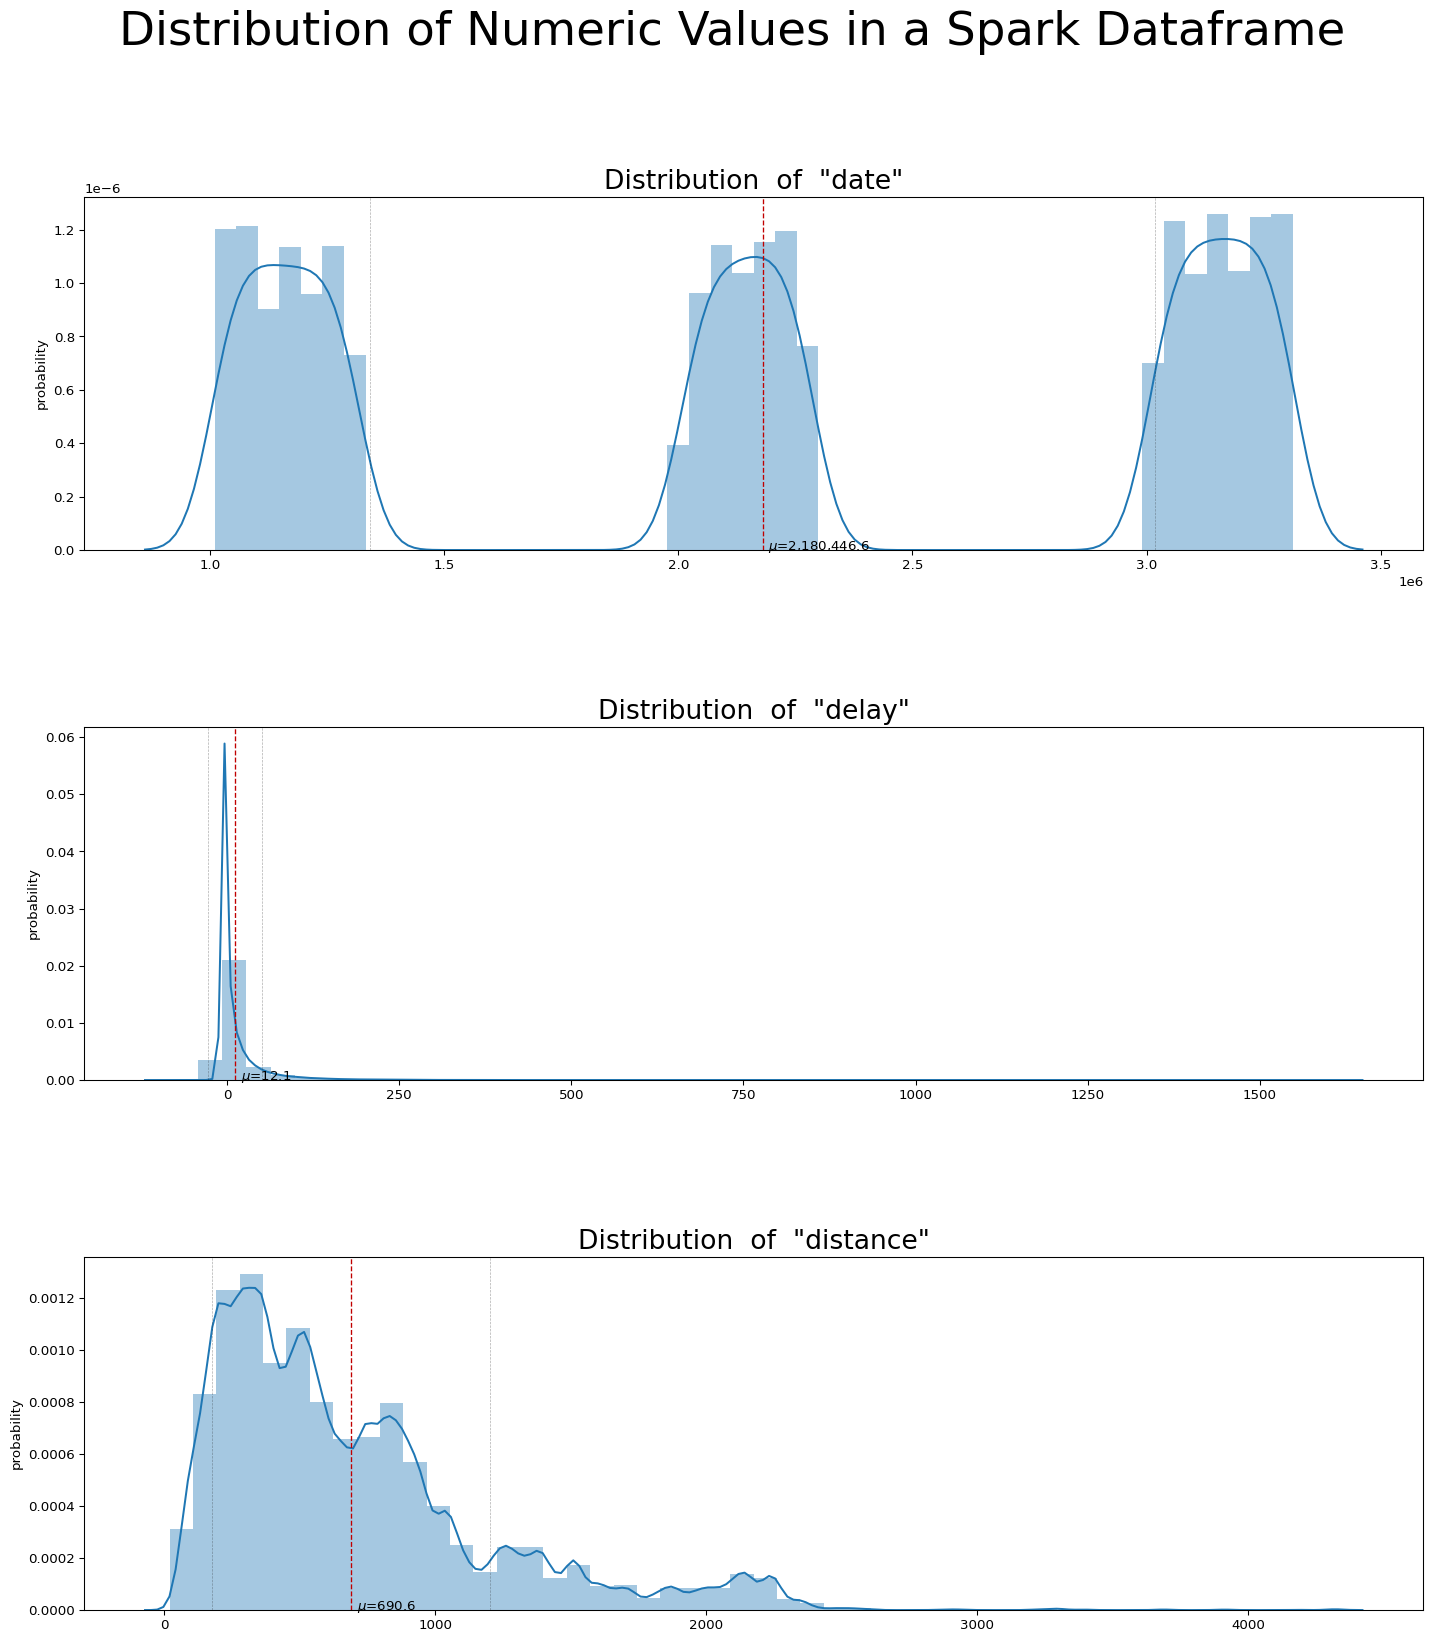

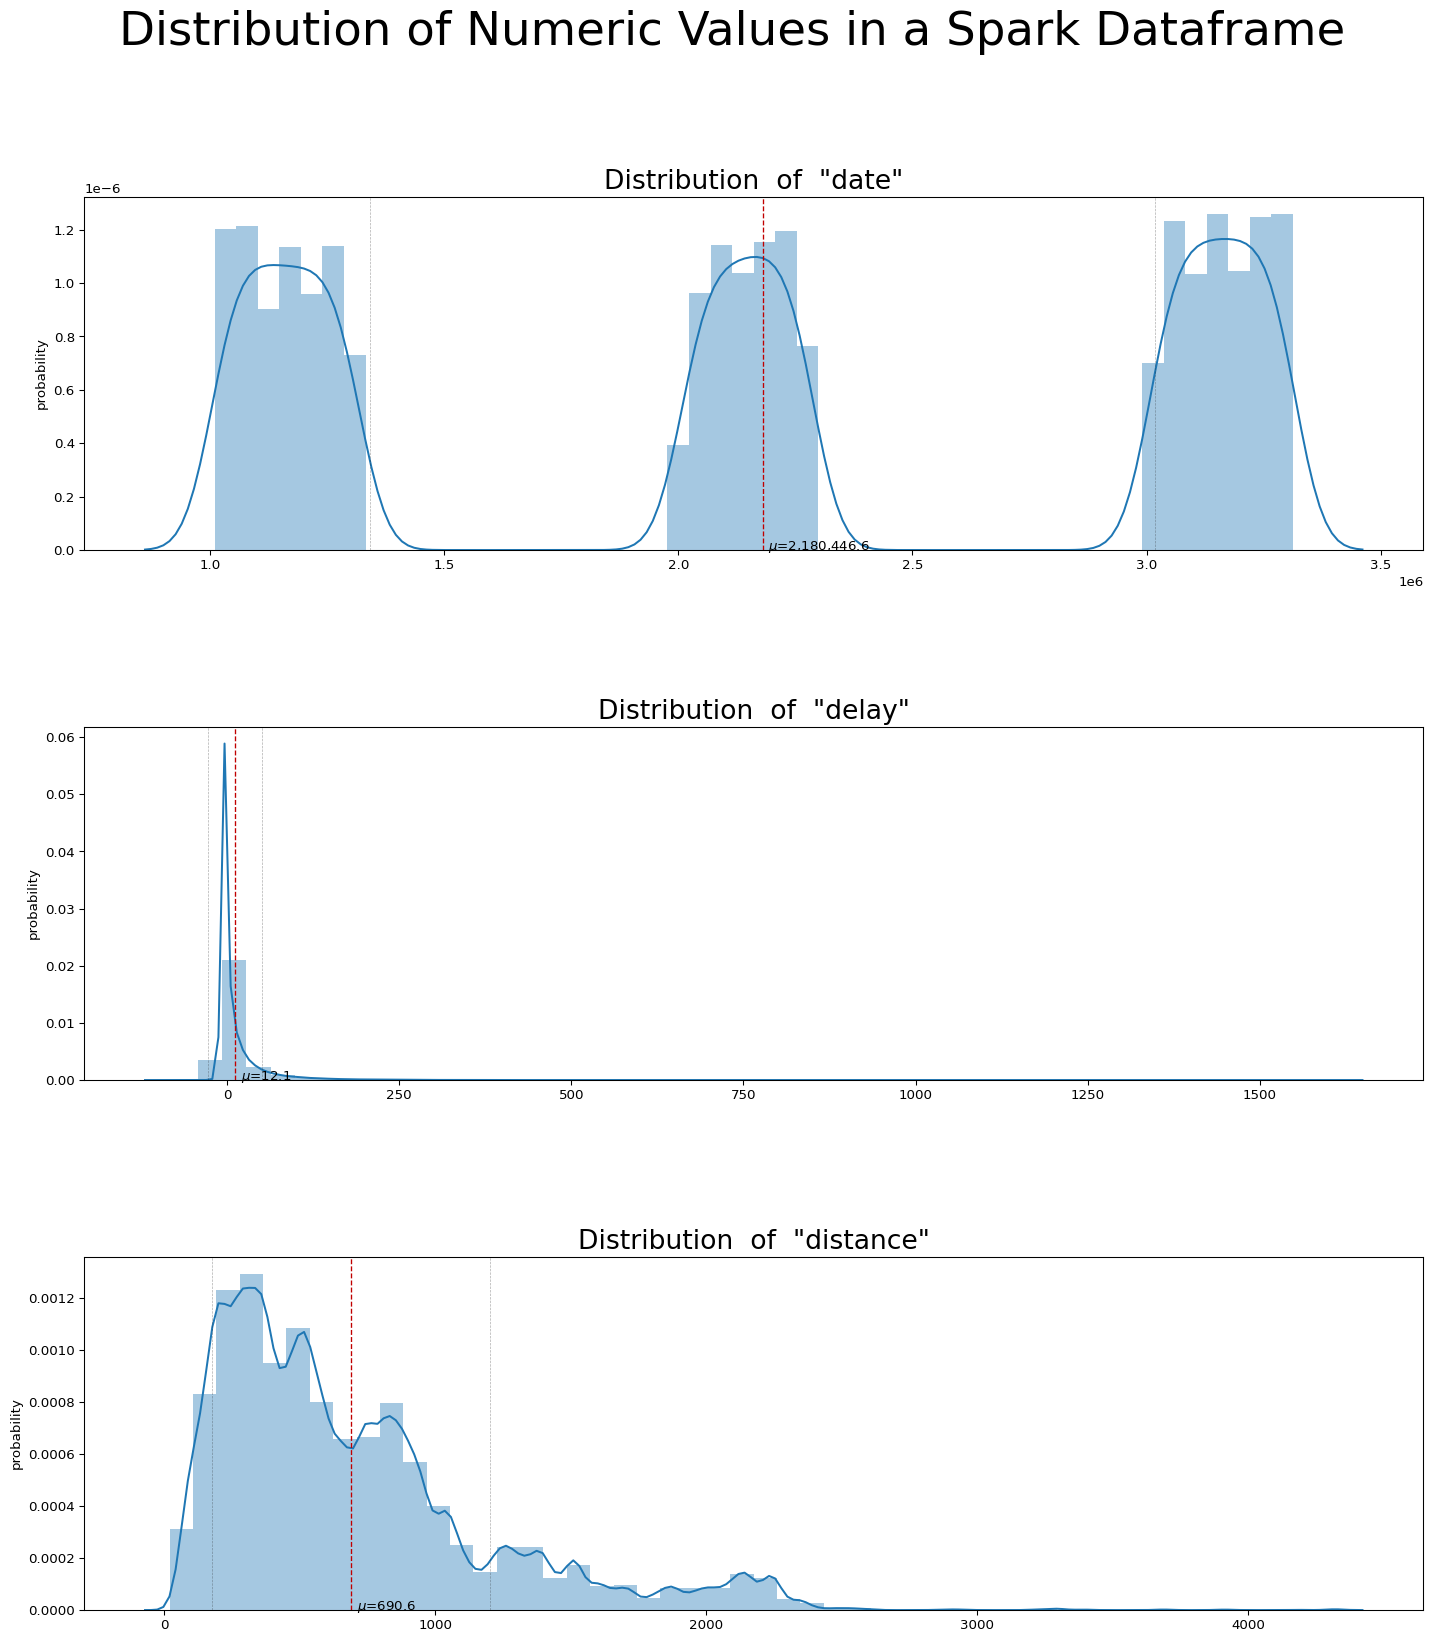

In [0]:
fig = plot_distributions(df, numeric_columns)
display(fig)